In [153]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
plt.style.use('fivethirtyeight') 
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [154]:
df = pd.read_excel('data prep.xlsx', sheet_name = 'data')

### Feature Engineering

In [155]:
df['Energy_Density'] = df['Laser Power(W)']/(df['Scan rate(mm/s)']*\
                                                       df['Layer thickness(µm)']*\
                                                       df['Hatch spacing(µm)'])

### Linear Correlation

<AxesSubplot:>

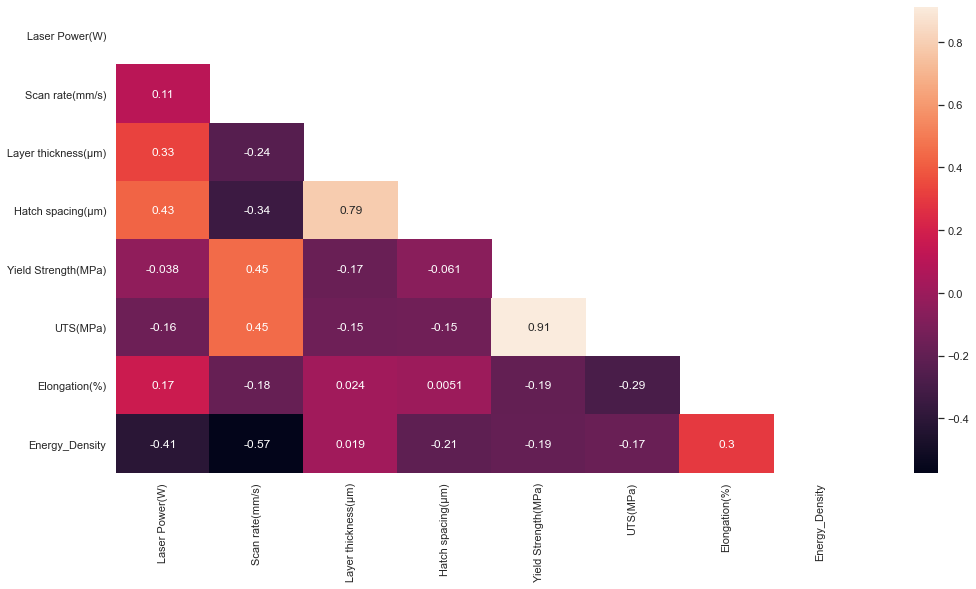

In [156]:
plt.figure(figsize=(15,8))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=matrix)

In [157]:
target_var1 = 'Yield Strength(MPa)'
target_var2 = 'UTS(MPa)'
target_var3 = 'Elongation(%)'

target_list = [target_var1, target_var2, target_var3]
all_col = list(df.select_dtypes('number').columns)

pair_list = [col for col in all_col if col not in target_list]

## Yield Strength, Ultimate Tensile Strenght and Elongation 

### Yield Strength vs All

In [158]:
#for col_name in pair_list:
#    df_pair = df[[col_name, target_var1]]
#    
#    scaler = MinMaxScaler()
#    df_pair[[col_name, target_var1]] = scaler.fit_transform(df_pair[[col_name, target_var1]])
#    
#    g = sns.jointplot(x=col_name, y=target_var1, data=df_pair,
#                  kind="reg", truncate=False,
#                  color="m", height=7)

### Ultimate Tensile Strength vs All

In [159]:
#for col_name in pair_list:
#    df_pair = df[[col_name, target_var2]]
#    
#    scaler = MinMaxScaler()
#    df_pair[[col_name, target_var2]] = scaler.fit_transform(df_pair[[col_name, target_var2]])
#    
#    g = sns.jointplot(x=col_name, y=target_var2, data=df_pair,
#                  kind="reg", truncate=False,
#                  color="m", height=7)

### Elongation vs All

In [160]:
#for col_name in pair_list:
#    df_pair = df[[col_name, target_var3]]
#    
#    scaler = MinMaxScaler()
#    df_pair[[col_name, target_var3]] = scaler.fit_transform(df_pair[[col_name, target_var3]])
#    
#    g = sns.jointplot(x=col_name, y=target_var3, data=df_pair,
#                  kind="reg", truncate=False,
#                  color="m", height=7)

### Machine Learning Development

In [161]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

In [162]:
target_var1 = 'Yield Strength(MPa)'
target_var2 = 'UTS(MPa)'
target_var3 = 'Elongation(%)'

df = df.dropna()
df = df.drop(columns = 'Orientation_Mapping')

In [163]:
df

,Laser Power(W),Scan rate(mm/s),Layer thickness(µm),Hatch spacing(µm),Yield Strength(MPa),UTS(MPa),Elongation(%),Energy_Density
1,200.0,1000.0,50.0,100.0,1180.000000,1263.333333,4.633333,0.000040
2,200.0,1000.0,50.0,100.0,1121.666667,1216.666667,4.166667,0.000040
3,200.0,225.0,50.0,100.0,978.000000,1143.000000,11.800000,0.000178
4,200.0,225.0,50.0,100.0,967.000000,1117.000000,8.900000,0.000178
5,200.0,225.0,50.0,100.0,1075.000000,1199.000000,7.600000,0.000178
7,280.0,1200.0,30.0,140.0,1035.000000,1200.000000,9.500000,0.000056
8,170.0,1250.0,30.0,100.0,1084.000000,1262.000000,6.100000,0.000045
9,250.0,1600.0,30.0,60.0,1110.000000,1267.000000,7.280000,0.000087
10,160.0,600.0,40.0,200.0,1137.000000,1206.000000,7.600000,0.000033
12,120.0,960.0,30.0,100.0,1098.000000,1237.000000,8.800000,0.000042


In [151]:
scaler = MinMaxScaler()
df[list(df.columns)] = scaler.fit_transform(df[list(df.columns)])

In [171]:
X = df[pair_list]
y1 = df[target_var1]
y2 = df[target_var2]
y3 = df[target_var3]

X_train, X_test, y_train1, y_test1 = train_test_split(X,y1,test_size = 0.1 , random_state = 123)
X_train, X_test, y_train2, y_test2 = train_test_split(X,y2,test_size = 0.1 , random_state = 123)
X_train, X_test, y_train3, y_test3 = train_test_split(X,y3,test_size = 0.1 , random_state = 123)

In [172]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate function
def r2_rmse(y_train, y_test, y_train_predict, y_test_predict):
    r2_train = r2_score(y_true = y_train, y_pred = y_train_predict)
    r2_test = r2_score(y_true = y_test, y_pred = y_test_predict)
    
    rmse_train = mean_squared_error(y_true = y_train, y_pred = y_train_predict, squared = False)
    rmse_test = mean_squared_error(y_true = y_test, y_pred = y_test_predict, squared = False)
    
    scoring = {'r2_train' : [r2_train],
               'r2_test'  : [r2_test],
               'rmse_train' : [rmse_train],
               'rmse_test' :  [rmse_test]}
    scoring_df = pd.DataFrame(scoring)
    
    print('R2 train : {:.4f}'.format(r2_train))
    print('R2 test : {:.4f}'.format(r2_test))
    print('RMSE train : {:.4f}'.format(rmse_train))
    print('RMSE test : {:.4f}'.format(rmse_test))
    
    return  scoring_df

## Decision Tree

In [173]:
from sklearn.preprocessing import MinMaxScaler

In [174]:
dt_regressor_1 = DecisionTreeRegressor(random_state = 0)
dt_regressor_2 = DecisionTreeRegressor(random_state = 0)
dt_regressor_3 = DecisionTreeRegressor(random_state = 0)

dt_regressor_1.fit(X_train,y_train1)
dt_regressor_2.fit(X_train,y_train2)
dt_regressor_3.fit(X_train,y_train3)

#y_test_pred_dt = dt_regressor.predict(X_test)
#y_train_pred_dt = dt_regressor.predict(X_train)
#
##Decision Tree Regression Accuracy with test set
#print('yield strength Accuracy: ', dt_regressor.score(X_test,y_test1))
#print('uts Accuracy: ', dt_regressor.score(X_test,y_test2))
#print('%elongation Accuracy: ', dt_regressor.score(X_test,y_test3))

DecisionTreeRegressor(random_state=0)

In [175]:
r2_rmse(y_train1, y_test1, y_train_pred_dt, y_test_pred_dt)

R2 train : 0.9543
R2 test : 0.8267
RMSE train : 19.4347
RMSE test : 41.2409


,r2_train,r2_test,rmse_train,rmse_test
0,0.954257,0.826704,19.434732,41.240908


### Test Manual Input

In [121]:
test_value = {'Laser Power(W)' : [180] , 'Scan rate(mm/s)' : [1250] , 
              'Layer thickness(µm)':[30] , 'Hatch spacing(µm)':[105]}

In [183]:
df_test_value = pd.DataFrame(data = test_value)
df_test_value['Energy_Density'] = df_test_value['Laser Power(W)']/(df_test_value['Scan rate(mm/s)']*\
                                                       df_test_value['Layer thickness(µm)']*\
                                                       df_test_value['Hatch spacing(µm)'])

In [188]:
print('Predicted Yield Strength(MPa):', list(dt_regressor_1.predict(df_test_value))[0])
print('Predicted UTS:', list(dt_regressor_2.predict(df_test_value))[0])
print("Predicted Elongation:", round(list(dt_regressor_3.predict(df_test_value))[0], 3))

Predicted Yield Strength: 1166.0
Predicted UTS: 1215.0
Predicted Elongation: 5.495


In [128]:
from sklearn import tree

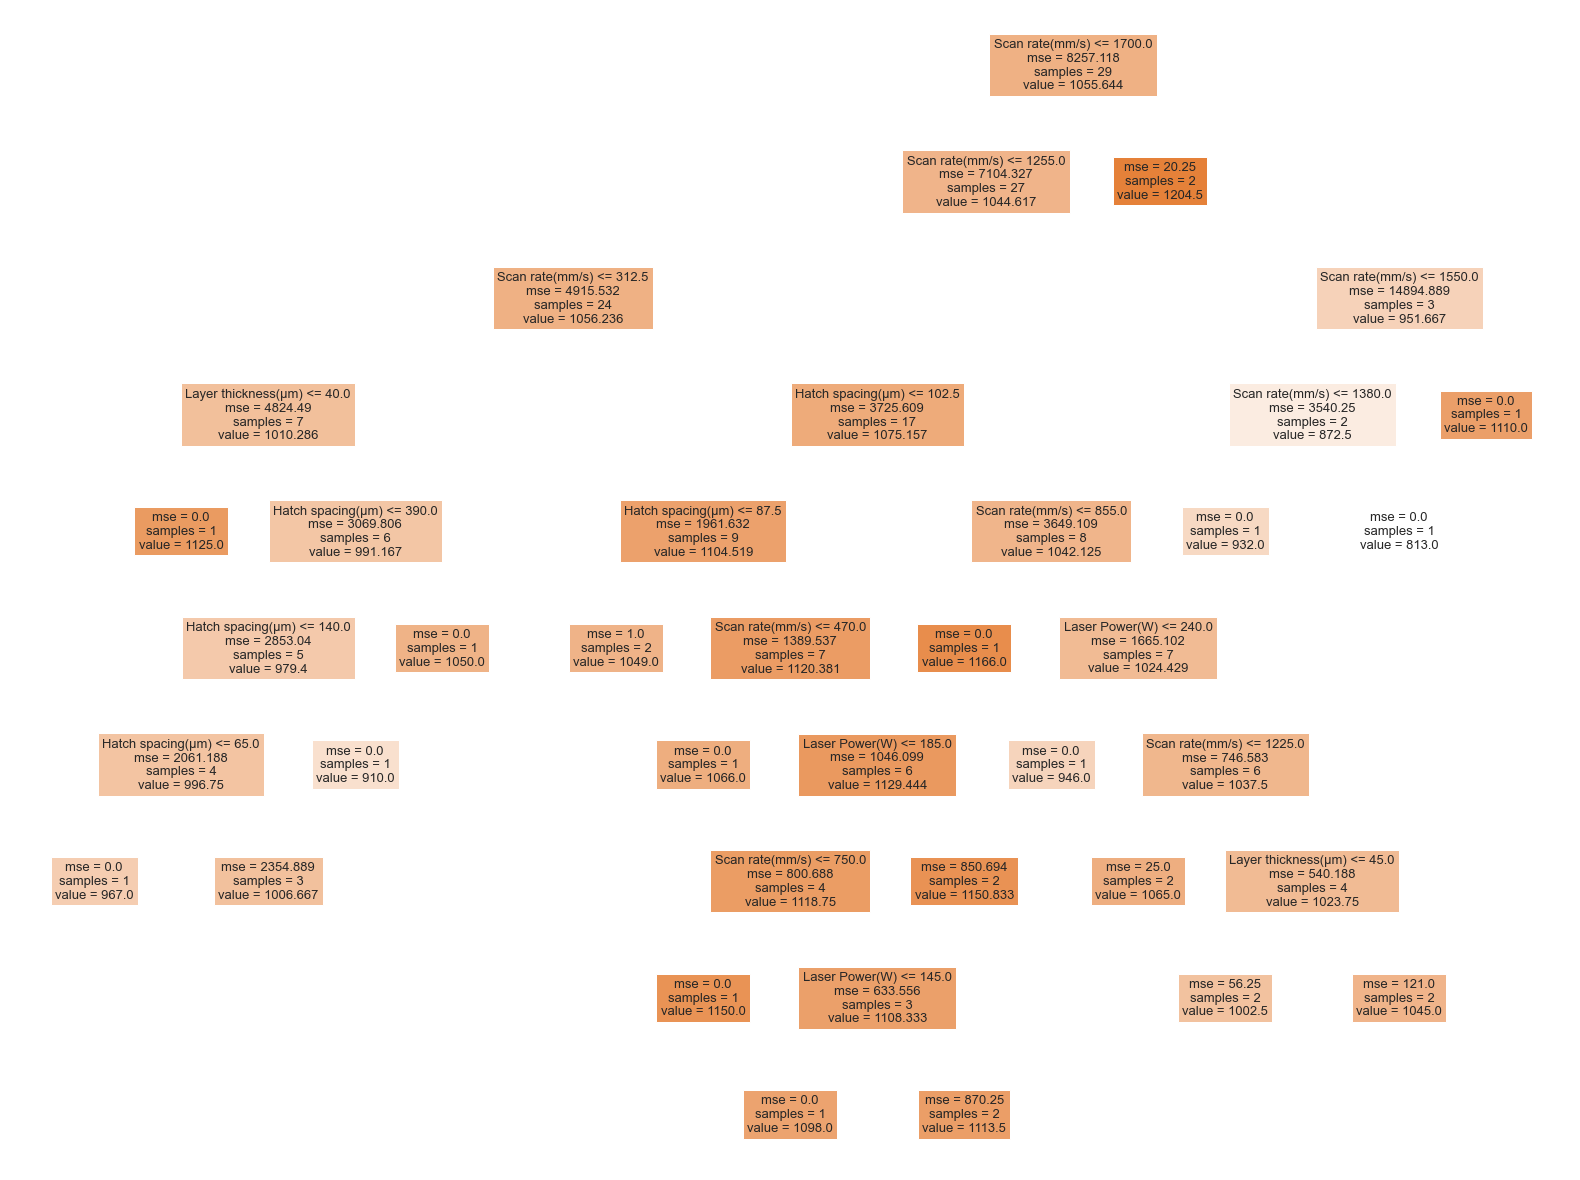

In [138]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_regressor_1, 
                   feature_names=list(X_train.columns),  
                   class_names= target_var1,
                   filled=True)

Feature: 0, Score: 0.15000
Feature: 1, Score: 0.01086
Feature: 2, Score: 0.09396
Feature: 3, Score: 0.18447
Feature: 4, Score: 0.56071


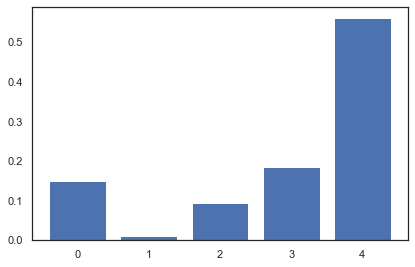

In [178]:
importance = dt_regressor_1.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()